# **Classificação de textos do Twitter com spaCy**

### Etapa 1: Bibliotecas

In [1]:
# Libs
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

### Etapa 2: Carregamento da Base de dados

In [2]:
# dados
bd = pd.read_csv('./data/base_treinamento.txt', encoding='utf-8')
bd.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [3]:
# tamanho da base de dados
bd.shape

(196, 2)

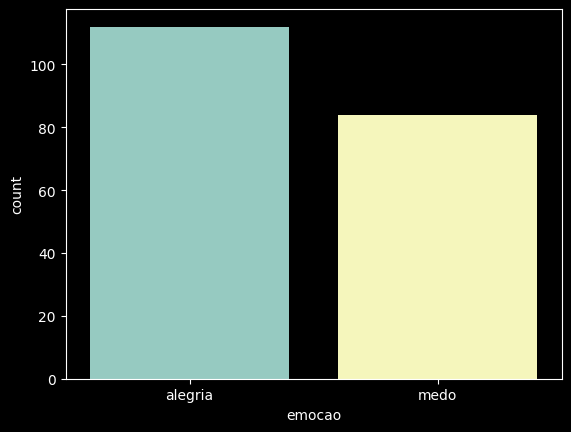

In [4]:
# gráficos de emoções 
sns.countplot(x=bd['emocao'], label='Contagem');

### Etapa 3: Função para pré-processamento dos textos

In [5]:
# Variável para remover pontuações 
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
# Variável para remover as stop_words
from spacy.lang.pt.stop_words import STOP_WORDS

stop_words = STOP_WORDS
len(stop_words)

416

In [7]:
# Carregando o spacy
spacy.prefer_gpu()
pln = spacy.load("pt_core_news_sm")
pln

In [8]:
# Criação da função de processamento 
def preprocessamento(texto):
    texto = texto.lower()
    documento = pln(texto)
    lista = []
    for token in documento:
        # lista.append(token.text)
        lista.append(token.lemma_)

    # removendo as stopwords
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

    return lista

In [9]:
# testando a função
teste = 'Estou aprendendo processamento de linguagem natural, no curso Inteligência Artificial e Machine Learning: O Guia Completo'
preprocessamento(teste)

'aprender processamento linguagem natural em o curso inteligência artificial Machine learning guia completo'